In [1]:
import os
import io
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from PIL import Image
from argparse import Namespace
from collections import defaultdict
from env.VRPInstance import VRPInstance
from plotly.subplots import make_subplots
from env.utils import load_scores, sort_instances
from tensorboard.backend.event_processing import event_accumulator

In [2]:
# Baseline
VNS_heuristic_scores = {
    "E-n22-k4.evrp": 384.67,
    "E-n23-k3.evrp": 571.94,
    "E-n30-k3.evrp": 509.47,
    "E-n33-k4.evrp": 840.14,
    "E-n51-k5.evrp": 529.90,
    "E-n76-k7.evrp": 692.64,
    "E-n101-k8.evrp": 839.29,
    "X-n143-k7.evrp": 16028.05,
    "X-n214-k11.evrp": 11323.56,
    "X-n351-k40.evrp": 27064.88,
    "X-n459-k26.evrp": 25370.80,
    "X-n573-k30.evrp": 52181.51,
    "X-n685-k75.evrp": 71345.40,
    "X-n749-k98.evrp": 81002.01,
    "X-n819-k171.evrp": 164289.95,
    "X-n916-k207.evrp": 341649.91,
    "X-n1001-k43.evrp": 77476.36
}

In [3]:
def compute_gap(scores):
    gaps = []
    for name, score in scores.items():
        baseline_score = VNS_heuristic_scores[name]
        gap = (baseline_score - score) / baseline_score
        gaps.append(gap)
    average_gap = np.mean(gaps)
    return average_gap

In [4]:
def read_tensorboard_event(folder):
    for file in os.listdir(folder):
        if "events" in file:
            event = event_accumulator.EventAccumulator(os.path.join(folder, file))
            event.Reload()
            return event

In [5]:
def load_all_scores(log_folder, seeds):
    data = defaultdict(list)
    for seed in seeds:
        folder = f"{log_folder}/seed_{seed}"
        data["Folder"].append(folder)
        event = read_tensorboard_event(folder)
        steps = event.Scalars("steps")
        running_time = steps[-1].wall_time - steps[0].wall_time
        keys = sort_instances(VNS_heuristic_scores.keys())
        for key in keys:
            scores = [x.value for x in event.Scalars(f"scores/{key}")]
            data[key].append(scores)
        data["Running Time"].append(round(running_time, 2))
    df = pd.DataFrame(data).set_index(["Folder", "Running Time"])
    return df

In [6]:
def plotly_fig2array(fig):
    fig_bytes = fig.to_image(format="png")
    buf = io.BytesIO(fig_bytes)
    img = Image.open(buf)
    return np.asarray(img)

In [7]:
def instance_fig(df, key):
    best_folder, _ = df[key].idxmin()
    data = load_scores(best_folder)[key]
    solution = data.solution
    args = Namespace(round_int=False, algo=None)
    instance = VRPInstance.from_path(f"dataset/train/data_evrp_wcci/{key}", args, f"sub_{key}")
    instance.solution = solution
    fig = instance.plot()
    return fig, data.score

In [8]:
print("HGS (lambda=0.1) scores:")
vrp_hgs_df = load_all_scores("logs/dataset_train_data_evrp_wcci_HGS_0.1", range(1, 21))
vrp_hgs_best_score = vrp_hgs_df.applymap(lambda x: min(x))
vrp_hgs_best_score.round(2)

HGS (lambda=0.1) scores:


E-n22-k4.evrp  \
Folder                                            Running Time                  
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_1  4777.06              386.96   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_2  4772.09              386.96   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_3  4788.85              386.96   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_4  4840.70              386.96   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_5  4717.08              386.96   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_6  4629.20              386.96   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_7  4876.17              386.96   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_8  4933.96              386.96   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_9  4885.77              386.96   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_10 4833.70              386.96   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_11 4695.29              386.96   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_12 4856.50              386.96   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_13 4671.37              386.96   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_14 4889.84              386.96   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_15 4863.96              386.96   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_16 4875.43              386.96   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_17 4756.79              386.96   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_18 4811.07              386.96   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_19 3041.27              386.96   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_20 2987.60              386.96   

                                                                E-n23-k3.evrp  \
Folder                                            Running Time                  
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_1  4777.06              581.07   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_2  4772.09              581.07   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_3  4788.85              581.07   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_4  4840.70              581.07   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_5  4717.08              581.07   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_6  4629.20              581.07   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_7  4876.17              581.07   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_8  4933.96              581.07   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_9  4885.77              581.07   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_10 4833.70              581.07   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_11 4695.29              581.07   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_12 4856.50              581.07   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_13 4671.37              581.07   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_14 4889.84              581.07   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_15 4863.96              581.07   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_16 4875.43              581.07   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_17 4756.79              581.07   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_18 4811.07              581.07   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_19 3041.27              581.07   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_20 2987.60              581.07   

                                                                E-n30-k3.evrp  \
Folder                                            Running Time                  
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_1  4777.06              509.47   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_2  4772.09              509.47   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_3  4788.85              509.47   
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_4  4840.70              509.47   
logs/dataset

In [9]:
print("HGS (lambda=0.1) scores:")
vrp_hgs_overall = vrp_hgs_best_score.apply(lambda x: [min(x), max(x), np.mean(x), np.std(x)])
vrp_hgs_overall.index = ["Min", "Max", "Mean", "Std."]
vrp_hgs_overall

HGS (lambda=0.1) scores:


E-n22-k4.evrp  E-n23-k3.evrp  E-n30-k3.evrp  E-n33-k4.evrp  \
Min      386.961273     581.070312     509.470428     840.145813   
Max      386.961273     581.070312     509.470428     840.145813   
Mean     386.961273     581.070312     509.470428     840.145813   
Std.       0.000000       0.000000       0.000000       0.000000   

      E-n51-k5.evrp  E-n76-k7.evrp  E-n101-k8.evrp  X-n143-k7.evrp  \
Min      529.900696     692.640564      838.999634    15865.193359   
Max      529.900696     692.640564      838.999634    15888.992188   
Mean     529.900696     692.640564      838.999634    15878.569141   
Std.       0.000000       0.000000        0.000000        4.989726   

      X-n214-k11.evrp  X-n351-k40.evrp  X-n459-k26.evrp  X-n573-k30.evrp  \
Min      10991.834961     26172.751953     24263.330078     51138.085938   
Max      11047.956055     26382.113281     24492.685547     51600.761719   
Mean     11025.595215     26270.969824     24357.204199     51361.368750   
Std.        13.980364        42.093496        54.954034       113.647426   

      X-n685-k75.evrp  X-n749-k98.evrp  X-n819-k171.evrp  X-n916-k207.evrp  \
Min      69071.375000     78683.914062     159395.984375     334086.750000   
Max      69312.273438     79020.078125     159803.078125     335049.093750   
Mean     69185.417578     78899.460938     159607.770313     334554.065625   
Std.        65.592356       104.778625        103.032729        254.567411   

      X-n1001-k43.evrp  
Min       74097.046875  
Max       74777.234375  
Mean      74483.363281  
Std.        167.918730

In [10]:
print("HGS (lambda=0.0) scores")
vrp_hgs_no_imitation_df = load_all_scores("logs/dataset_train_data_evrp_wcci_HGS_0.0", range(1, 7))
vrp_hgs_no_imitation_best_score = vrp_hgs_no_imitation_df.applymap(lambda x: min(x))
vrp_hgs_no_imitation_best_score.round(2)

HGS (lambda=0.0) scores


E-n22-k4.evrp  \
Folder                                           Running Time                  
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_1 2731.25              386.96   
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_2 2756.79              386.96   
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_3 2755.09              386.96   
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_4 2728.22              386.96   
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_5 2659.04              386.96   
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_6 2624.09              386.96   

                                                               E-n23-k3.evrp  \
Folder                                           Running Time                  
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_1 2731.25              581.07   
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_2 2756.79              581.07   
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_3 2755.09              581.07   
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_4 2728.22              581.07   
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_5 2659.04              581.07   
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_6 2624.09              581.07   

                                                               E-n30-k3.evrp  \
Folder                                           Running Time                  
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_1 2731.25              509.47   
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_2 2756.79              509.47   
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_3 2755.09              509.47   
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_4 2728.22              509.47   
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_5 2659.04              509.47   
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_6 2624.09              509.47   

                                                               E-n33-k4.evrp  \
Folder                                           Running Time                  
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_1 2731.25              840.15   
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_2 2756.79              840.15   
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_3 2755.09              840.15   
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_4 2728.22              840.15   
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_5 2659.04              840.15   
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_6 2624.09              840.15   

                                                               E-n51-k5.evrp  \
Folder                                           Running Time                  
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_1 2731.25               529.9   
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_2 2756.79               529.9   
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_3 2755.09               529.9   
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_4 2728.22               529.9   
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_5 2659.04               529.9   
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_6 2624.09               529.9   

                                                               E-n76-k7.evrp  \
Folder                                           Running Time                  
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_1 2731.25              692.64   
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_2 2756.79              692.64   
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_3 2755.09              692.64   
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_4 2728.22              692.64   
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_5 2659.04              692.64   
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_6 2624.09              692.64   

                                                               E-n101-k8.evrp  \
Folder                                           Running Time                   
logs/dataset_train_data_evrp_wcci_HGS_0.0/seed_1 2731.2

In [11]:
print("HGS (lambda=0.0) scores")
vrp_hgs_no_imitation_overall = vrp_hgs_no_imitation_best_score.apply(lambda x: [min(x), max(x), np.mean(x), np.std(x)])
vrp_hgs_no_imitation_overall.index = ["Min", "Max", "Mean", "Std."]
vrp_hgs_no_imitation_overall

HGS (lambda=0.0) scores


E-n22-k4.evrp  E-n23-k3.evrp  E-n30-k3.evrp  E-n33-k4.evrp  \
Min      386.961273     581.070312     509.470428     840.145813   
Max      386.961273     581.070312     509.470428     840.145813   
Mean     386.961273     581.070312     509.470428     840.145813   
Std.       0.000000       0.000000       0.000000       0.000000   

      E-n51-k5.evrp  E-n76-k7.evrp  E-n101-k8.evrp  X-n143-k7.evrp  \
Min      529.900696     692.640564      836.071777    15865.193359   
Max      529.900696     692.640564      838.999634    15880.761719   
Mean     529.900696     692.640564      838.511658    15877.791341   
Std.       0.000000       0.000000        1.091148        5.693784   

      X-n214-k11.evrp  X-n351-k40.evrp  X-n459-k26.evrp  X-n573-k30.evrp  \
Min      11018.850586     26280.464844     24338.128906     51264.652344   
Max      11041.023438     26366.541016     24391.339844     51433.781250   
Mean     11026.722819     26322.425456     24363.197917     51342.565104   
Std.         8.188896        26.499441        19.052395        51.961808   

      X-n685-k75.evrp  X-n749-k98.evrp  X-n819-k171.evrp  X-n916-k207.evrp  \
Min      69197.406250     79001.265625     159766.875000     333647.156250   
Max      69320.789062     79226.375000     159925.781250     334117.812500   
Mean     69244.641927     79062.453125     159852.559896     333990.270833   
Std.        42.343158        79.716465         53.904192        158.180416   

      X-n1001-k43.evrp  
Min       74231.375000  
Max       74733.656250  
Mean      74485.468750  
Std.        161.396935

In [12]:
print("VNS (lambda=0.1) scores")
vrp_vns_df = load_all_scores("logs/dataset_train_data_evrp_wcci_VNS_0.1", range(1, 21))
vrp_vns_best_score = vrp_vns_df.applymap(lambda x: min(x))
vrp_vns_best_score.round(2)

VNS (lambda=0.1) scores


E-n22-k4.evrp  \
Folder                                            Running Time                  
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_1  9183.20              384.68   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_2  9194.62              384.68   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_3  9191.35              384.68   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_4  9219.96              384.68   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_5  9082.87              384.68   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_6  9183.91              384.68   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_7  9291.27              384.68   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_8  9098.14              384.68   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_9  9299.28              384.68   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_10 9081.88              384.68   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_11 9312.47              384.68   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_12 9122.86              384.68   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_13 9187.95              384.68   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_14 8712.23              384.68   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_15 9247.93              384.68   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_16 8611.65              384.68   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_17 9119.04              384.68   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_18 8667.68              384.68   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_19 5154.58              384.68   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_20 5033.51              384.68   

                                                                E-n23-k3.evrp  \
Folder                                            Running Time                  
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_1  9183.20              571.95   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_2  9194.62              571.95   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_3  9191.35              571.95   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_4  9219.96              571.95   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_5  9082.87              571.95   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_6  9183.91              571.95   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_7  9291.27              571.95   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_8  9098.14              571.95   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_9  9299.28              571.95   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_10 9081.88              571.95   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_11 9312.47              571.95   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_12 9122.86              571.95   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_13 9187.95              571.95   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_14 8712.23              571.95   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_15 9247.93              571.95   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_16 8611.65              571.95   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_17 9119.04              571.95   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_18 8667.68              571.95   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_19 5154.58              571.95   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_20 5033.51              571.95   

                                                                E-n30-k3.evrp  \
Folder                                            Running Time                  
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_1  9183.20              509.47   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_2  9194.62              509.47   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_3  9191.35              509.47   
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_4  9219.96              509.47   
logs/dataset

In [13]:
print("VNS (lambda=0.1) scores")
vrp_vns_overall = vrp_vns_best_score.apply(lambda x: [min(x), max(x), np.mean(x), np.std(x)])
vrp_vns_overall.index = ["Min", "Max", "Mean", "Std."]
vrp_vns_overall

VNS (lambda=0.1) scores


E-n22-k4.evrp  E-n23-k3.evrp  E-n30-k3.evrp  E-n33-k4.evrp  \
Min      384.678101     571.947388     509.470428     840.145813   
Max      384.678101     571.947388     509.470428     840.145813   
Mean     384.678101     571.947388     509.470428     840.145813   
Std.       0.000000       0.000000       0.000000       0.000000   

      E-n51-k5.evrp  E-n76-k7.evrp  E-n101-k8.evrp  X-n143-k7.evrp  \
Min      529.900696     692.640564      835.394714    15883.649414   
Max      543.389160     696.266724      847.191406    16363.103516   
Mean     541.604834     693.547104      841.222937    16068.344092   
Std.       3.955021       1.570173        3.496276      117.105764   

      X-n214-k11.evrp  X-n351-k40.evrp  X-n459-k26.evrp  X-n573-k30.evrp  \
Min      11152.297852     26653.580078     24905.687500     51662.632812   
Max      11427.552734     26937.113281     25171.638672     52097.230469   
Mean     11274.157812     26792.167871     25046.889062     51861.316016   
Std.        67.764833        79.071508        81.238345       131.556213   

      X-n685-k75.evrp  X-n749-k98.evrp  X-n819-k171.evrp  X-n916-k207.evrp  \
Min      70043.210938     79794.257812     161832.703125     335911.843750   
Max      70739.242188     80321.875000     162340.593750     337364.937500   
Mean     70415.339453     80074.194141     162093.452344     336633.832813   
Std.       177.443736       138.259836        146.680739        350.019285   

      X-n1001-k43.evrp  
Min       76145.359375  
Max       76978.007812  
Mean      76538.755078  
Std.        257.093411

In [14]:
print("VNS (lambda=0.0) scores")
vrp_vns_no_imitation_df = load_all_scores("logs/dataset_train_data_evrp_wcci_VNS_0.0", range(1, 7))
vrp_vns_no_imitation_best_score = vrp_vns_no_imitation_df.applymap(lambda x: min(x))
vrp_vns_no_imitation_best_score.round(2)

VNS (lambda=0.0) scores


E-n22-k4.evrp  \
Folder                                           Running Time                  
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_1 7223.62              384.68   
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_2 7214.66              384.68   
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_3 7243.10              384.68   
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_4 7261.70              384.68   
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_5 7197.83              384.68   
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_6 7254.32              384.68   

                                                               E-n23-k3.evrp  \
Folder                                           Running Time                  
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_1 7223.62              571.95   
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_2 7214.66              571.95   
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_3 7243.10              571.95   
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_4 7261.70              571.95   
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_5 7197.83              571.95   
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_6 7254.32              571.95   

                                                               E-n30-k3.evrp  \
Folder                                           Running Time                  
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_1 7223.62              509.47   
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_2 7214.66              509.47   
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_3 7243.10              509.47   
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_4 7261.70              509.47   
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_5 7197.83              509.47   
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_6 7254.32              509.47   

                                                               E-n33-k4.evrp  \
Folder                                           Running Time                  
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_1 7223.62              840.15   
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_2 7214.66              840.15   
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_3 7243.10              840.15   
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_4 7261.70              840.15   
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_5 7197.83              840.15   
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_6 7254.32              840.15   

                                                               E-n51-k5.evrp  \
Folder                                           Running Time                  
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_1 7223.62              529.90   
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_2 7214.66              529.90   
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_3 7243.10              533.78   
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_4 7261.70              533.78   
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_5 7197.83              529.90   
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_6 7254.32              530.10   

                                                               E-n76-k7.evrp  \
Folder                                           Running Time                  
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_1 7223.62              692.64   
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_2 7214.66              692.64   
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_3 7243.10              692.64   
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_4 7261.70              692.64   
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_5 7197.83              692.64   
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_6 7254.32              692.64   

                                                               E-n101-k8.evrp  \
Folder                                           Running Time                   
logs/dataset_train_data_evrp_wcci_VNS_0.0/seed_1 7223.6

In [15]:
print("VNS (lambda=0.0) scores")
vrp_vns_no_imitation_overall = vrp_vns_no_imitation_best_score.apply(lambda x: [min(x), max(x), np.mean(x), np.std(x)])
vrp_vns_no_imitation_overall.index = ["Min", "Max", "Mean", "Std."]
vrp_vns_no_imitation_overall

VNS (lambda=0.0) scores


E-n22-k4.evrp  E-n23-k3.evrp  E-n30-k3.evrp  E-n33-k4.evrp  \
Min      384.678101     571.947388     509.470428     840.145813   
Max      384.678101     571.947388     509.470428     840.145813   
Mean     384.678101     571.947388     509.470428     840.145813   
Std.       0.000000       0.000000       0.000000       0.000000   

      E-n51-k5.evrp  E-n76-k7.evrp  E-n101-k8.evrp  X-n143-k7.evrp  \
Min      529.900696     692.640564      834.221497    15894.589844   
Max      533.776489     692.640564      838.999634    16035.065430   
Mean     531.225739     692.640564      836.983877    15935.471029   
Std.       1.805020       0.000000        1.530349       47.990195   

      X-n214-k11.evrp  X-n351-k40.evrp  X-n459-k26.evrp  X-n573-k30.evrp  \
Min      11199.289062     26806.125000     25050.775391     51774.472656   
Max      11361.509766     26862.658203     25121.058594     52204.882812   
Mean     11277.730306     26831.272461     25080.607422     51942.927734   
Std.        63.278158        21.592201        28.547939       133.882406   

      X-n685-k75.evrp  X-n749-k98.evrp  X-n819-k171.evrp  X-n916-k207.evrp  \
Min      70265.578125     79989.710938     162261.406250     337513.500000   
Max      70710.054688     80471.976562     162791.890625     338252.843750   
Mean     70527.257812     80274.052083     162611.062500     337977.520833   
Std.       169.266873       166.384837        181.440012        252.765246   

      X-n1001-k43.evrp  
Min       76543.851562  
Max       76927.875000  
Mean      76778.783854  
Std.        127.429446

In [16]:
hgs_running_time = np.mean(vrp_hgs_df.index.get_level_values("Running Time"))/3600
hgs_no_imitation_running_time = np.mean(vrp_hgs_no_imitation_df.index.get_level_values("Running Time"))/3600
vns_running_time = np.mean(vrp_vns_df.index.get_level_values("Running Time"))/3600
vns_no_imitation_running_time = np.mean(vrp_vns_no_imitation_df.index.get_level_values("Running Time"))/3600
print(f"HGS (lambda=0.1) running time = {hgs_running_time:.2f}h")
print(f"HGS (lambda=0.0) running time = {hgs_no_imitation_running_time:.2f}h")
print(f"VNS (lambda=0.1) running time = {vns_running_time:.2f}h")
print(f"VNS (lambda=0.0) running time = {vns_no_imitation_running_time:.2f}h")

HGS (lambda=0.1) running time = 1.28h
HGS (lambda=0.0) running time = 0.75h
VNS (lambda=0.1) running time = 2.42h
VNS (lambda=0.0) running time = 2.01h


In [17]:
def get_gap_df(df, name, running_time):
    results = defaultdict(list)
    n = max(df.applymap(lambda x: len(x)).max())
    for i in range(n):
        score_df = df.applymap(lambda x: min(x[:i+1])).min()
        gap = compute_gap(score_df)
        results[name].append(gap)
        results["Running Time"].append((i+1)*running_time/n)
    results = pd.DataFrame(results)
    return results

In [18]:
hgs_gap = get_gap_df(vrp_hgs_df, "HGS gap", hgs_running_time)
hgs_no_imitation_gap = get_gap_df(vrp_hgs_no_imitation_df, "HGS gap", hgs_no_imitation_running_time)
vns_gap = get_gap_df(vrp_vns_df, "VNS gap", vns_running_time)
vns_no_imitation_gap = get_gap_df(vrp_vns_no_imitation_df, "VNS gap", vns_no_imitation_running_time)

In [19]:
print(f"HGS (lambda=0.1) gap: {hgs_gap.max()['HGS gap']*100:.2f}%")
print(f"HGS (lambda=0.0) loss gap: {hgs_no_imitation_gap.max()['HGS gap']*100:.2f}%")
print(f"VNS (lambda=0.1) gap: {vns_gap.max()['VNS gap']*100:.2f}%")
print(f"VNS (lambda=0.0) loss gap: {vns_no_imitation_gap.max()['VNS gap']*100:.2f}%")

HGS (lambda=0.1) gap: 1.59%
HGS (lambda=0.0) loss gap: 1.49%
VNS (lambda=0.1) gap: 0.91%
VNS (lambda=0.0) loss gap: 0.70%


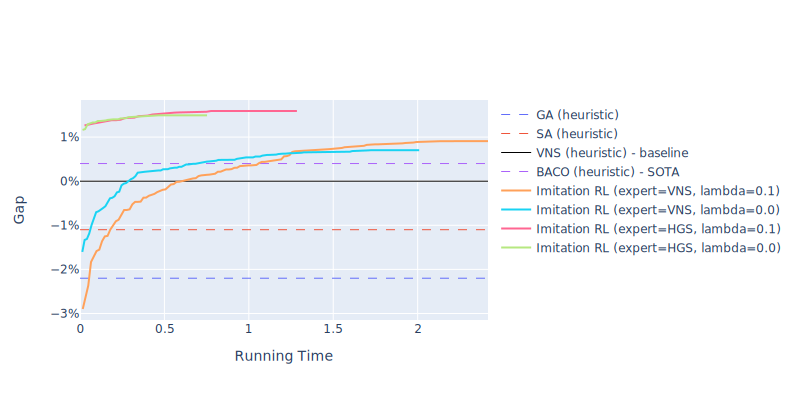

In [20]:
fig = go.Figure()
fig.add_scatter(x=[0, vns_running_time], y=[-0.022, -0.022], name="GA (heuristic)", mode="lines", line=dict(dash='dash', width=1))
fig.add_scatter(x=[0, vns_running_time], y=[-0.011, -0.011], name="SA (heuristic)", mode="lines", line=dict(dash='dash', width=1))
fig.add_scatter(x=[0, vns_running_time], y=[0, 0], name="VNS (heuristic) - baseline", mode="lines", line=dict(color='black', width=1))
fig.add_scatter(x=[0, vns_running_time], y=[0.004, 0.004], name="BACO (heuristic) - SOTA", mode="lines", line=dict(dash='dash', width=1))
fig.add_scatter(x=vns_gap["Running Time"], y=vns_gap["VNS gap"], name="Imitation RL (expert=VNS, lambda=0.1)", line=dict(width=2))
fig.add_scatter(x=vns_no_imitation_gap["Running Time"], y=vns_no_imitation_gap["VNS gap"], name="Imitation RL (expert=VNS, lambda=0.0)", line=dict(width=2))
fig.add_scatter(x=hgs_gap["Running Time"], y=hgs_gap["HGS gap"], name="Imitation RL (expert=HGS, lambda=0.1)", line=dict(width=2))
fig.add_scatter(x=hgs_no_imitation_gap["Running Time"], y=hgs_no_imitation_gap["HGS gap"], name="Imitation RL (expert=HGS, lambda=0.0)", line=dict(width=2))
fig.update_layout(xaxis_title="Running Time", xaxis_dtick=0.5, yaxis_title="Gap", yaxis_tickformat=",.0%", width=800, height=400)
fig.show("svg")

In [21]:
print("HGS (lambda=0.1) graphs")
fig = make_subplots(rows=4, cols=5, horizontal_spacing=0, vertical_spacing=0.05)
os.makedirs("graphs/dataset_train_data_evrp_wcci_HGS_0.1", exist_ok=True)
for i, key in enumerate(sort_instances(VNS_heuristic_scores.keys())):
    plotly_fig, score = instance_fig(vrp_hgs_best_score, key)
    plotly_fig.write_image(f"graphs/dataset_train_data_evrp_wcci_HGS_0.1/{key}.pdf")
    title = key.split(".")[0] + f" - {score:.1f}"
    fig.add_traces(plotly_fig.data, rows=i//5+1, cols=i%5+1)
    fig['layout'][f'xaxis{i+1}'].update(title=title)
fig.update_layout(height=1000, width=1200)
fig.update_traces(line_width=0.5, marker_size=1)
fig.update_layout(template='plotly_white', margin=dict(l=0, r=0, t=0, b=0, pad=0, autoexpand=True))
fig.update_xaxes(showgrid=False, showticklabels=False, showline=False, zeroline=False)
fig.update_yaxes(visible=False)
fig.update_layout(showlegend=False)
fig.show("svg")

HGS (lambda=0.1) graphs


In [22]:
print("HGS (lambda=0.0) graphs")
fig = make_subplots(rows=4, cols=5, horizontal_spacing=0, vertical_spacing=0.05)
os.makedirs("graphs/dataset_train_data_evrp_wcci_HGS_0.0", exist_ok=True)
for i, key in enumerate(sort_instances(VNS_heuristic_scores.keys())):
    plotly_fig, score = instance_fig(vrp_hgs_best_score, key)
    plotly_fig.write_image(f"graphs/dataset_train_data_evrp_wcci_HGS_0.0/{key}.pdf")
    title = key.split(".")[0] + f" - {score:.1f}"
    fig.add_traces(plotly_fig.data, rows=i//5+1, cols=i%5+1)
    fig['layout'][f'xaxis{i+1}'].update(title=title)
fig.update_layout(height=1000, width=1200)
fig.update_traces(line_width=0.5, marker_size=1)
fig.update_layout(template='plotly_white', margin=dict(l=0, r=0, t=0, b=0, pad=0, autoexpand=True))
fig.update_xaxes(showgrid=False, showticklabels=False, showline=False, zeroline=False)
fig.update_yaxes(visible=False)
fig.update_layout(showlegend=False)
fig.show("svg")

HGS (lambda=0.0) graphs


In [23]:
print("VNS (lambda=0.1) graphs")
fig = make_subplots(rows=4, cols=5, horizontal_spacing=0, vertical_spacing=0.05)
os.makedirs("graphs/dataset_train_data_evrp_wcci_VNS_0.1", exist_ok=True)
for i, key in enumerate(sort_instances(VNS_heuristic_scores.keys())):
    plotly_fig, score = instance_fig(vrp_vns_best_score, key)
    plotly_fig.write_image(f"graphs/dataset_train_data_evrp_wcci_VNS_0.1/{key}.pdf")
    title = key.split(".")[0] + f" - {score:.1f}"
    fig.add_traces(plotly_fig.data, rows=i//5+1, cols=i%5+1)
    fig['layout'][f'xaxis{i+1}'].update(title=title)
fig.update_layout(height=1000, width=1200)
fig.update_traces(line_width=0.5, marker_size=1)
fig.update_layout(template='plotly_white', margin=dict(l=0, r=0, t=0, b=0, pad=0, autoexpand=True))
fig.update_xaxes(showgrid=False, showticklabels=False, showline=False, zeroline=False)
fig.update_yaxes(visible=False)
fig.update_layout(showlegend=False)
fig.show("svg")

VNS (lambda=0.1) graphs


In [24]:
print("VNS (lambda=0.0) graphs")
fig = make_subplots(rows=4, cols=5, horizontal_spacing=0, vertical_spacing=0.05)
os.makedirs("graphs/dataset_train_data_evrp_wcci_VNS_0.0", exist_ok=True)
for i, key in enumerate(sort_instances(VNS_heuristic_scores.keys())):
    plotly_fig, score = instance_fig(vrp_vns_best_score, key)
    plotly_fig.write_image(f"graphs/dataset_train_data_evrp_wcci_VNS_0.0/{key}.pdf")
    title = key.split(".")[0] + f" - {score:.1f}"
    fig.add_traces(plotly_fig.data, rows=i//5+1, cols=i%5+1)
    fig['layout'][f'xaxis{i+1}'].update(title=title)
fig.update_layout(height=1000, width=1200)
fig.update_traces(line_width=0.5, marker_size=1)
fig.update_layout(template='plotly_white', margin=dict(l=0, r=0, t=0, b=0, pad=0, autoexpand=True))
fig.update_xaxes(showgrid=False, showticklabels=False, showline=False, zeroline=False)
fig.update_yaxes(visible=False)
fig.update_layout(showlegend=False)
fig.show("svg")

VNS (lambda=0.0) graphs
